In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
path = "./og.csv" # non feature selection csv 
df = pd.read_csv(path)

In [4]:
df.sample(5)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
190387,190387,320742,0,Cash loans,F,N,Y,0,157500.0,886176.0,...,1.0,0.0,0.0,0.0,65.112329,60 Above,1000.665753,NaN,Low,Very High
267339,267339,409737,0,Revolving loans,F,N,Y,0,90000.0,247500.0,...,0.0,0.0,0.0,1.0,49.947945,40-50,10.536986,10-15,Very Low,Low
63453,63453,173584,0,Cash loans,F,N,Y,0,90000.0,130320.0,...,0.0,0.0,1.0,1.0,50.008219,50-60,27.405479,25-30,Very Low,Very Low
289550,289550,435451,0,Cash loans,F,N,Y,1,157500.0,892044.0,...,0.0,0.0,1.0,2.0,43.791781,40-50,7.745205,5-10,Low,Very High
276928,276928,420947,0,Cash loans,M,Y,Y,0,202500.0,288562.5,...,0.0,0.0,0.0,2.0,26.602740,20-30,7.717808,5-10,Low,Low


In [5]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium


<AxesSubplot: xlabel='TARGET', ylabel='count'>

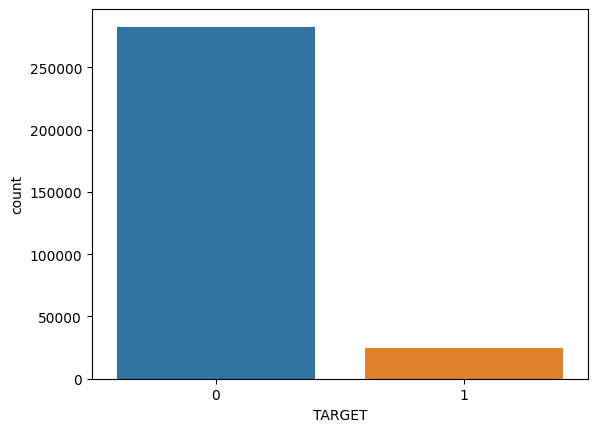

In [8]:
sns.countplot(x='TARGET', data=df)

### Find correlation with Target to select Features

In [9]:
df.corr()['TARGET'].sort_values(ascending=False)

C:\Users\VARUN ARORA\AppData\Local\Temp\ipykernel_6920\1542250680.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['TARGET'].sort_values(ascending=False)


TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.012161
OBS_30_CNT_SOCIAL_CIRCLE       0.009447
OBS_60_CNT_SOCIAL_CIRCLE       0.009337
CNT_FAM_MEMBERS                0.009308
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
LIVE_REGION_NOT_WORK_REGION    0.002819
AMT_REQ_CREDIT_BUREAU_DAY      0.001701
FLAG_MOBIL                     0.000534
FLAG_CONT_MOBILE               0.000370
AMT_REQ_CREDIT_BUREAU_HOUR    -0.000074
AMT_REQ_CREDIT_BUREAU_WEEK    -0.001306
FLAG_EMAIL                    -0.001758
SK_ID_CURR                    -0.002108


#### Drop middle columns to get top and bottom 8 in terms of correlation

In [10]:
df.drop(['FLAG_WORK_PHONE','CNT_CHILDREN','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','AMT_REQ_CREDIT_BUREAU_DAY','FLAG_MOBIL',
         'FLAG_CONT_MOBILE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_EMAIL', 'SK_ID_CURR','AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_MON',  'FLAG_PHONE', 'HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START'], axis =1, inplace=True)

In [11]:
df.corr()['TARGET'].sort_values(ascending=False)

C:\Users\VARUN ARORA\AppData\Local\Temp\ipykernel_6920\1542250680.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['TARGET'].sort_values(ascending=False)


TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
REGION_POPULATION_RELATIVE    -0.037227
AMT_GOODS_PRICE               -0.039645
DAYS_REGISTRATION             -0.041975
DAYS_EMPLOYED                 -0.047046
EMPLOYMENT_YEARS              -0.047046
DAYS_ID_PUBLISH               -0.051457
DAYS_LAST_PHONE_CHANGE        -0.055218
DAYS_BIRTH                    -0.078239
AGE                           -0.078239
EXT_SOURCE_3                  -0.155892
EXT_SOURCE_2                  -0.160295
Name: TARGET, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_GOODS_PRICE              307233 non-null  float64
 6   NAME_INCOME_TYPE             307511 non-null  object 
 7   NAME_EDUCATION_TYPE          307511 non-null  object 
 8   NAME_FAMILY_STATUS           307511 non-null  object 
 9   NAME_HOUSING_TYPE            307511 non-null  object 
 10  REGION_POPULATION_RELATIVE   307511 non-null  float64
 11  DAYS_BIRTH                   307511 non-null  int64  
 12  DAYS_EMPLOYED                307511 non-null  int64  
 13 

In [13]:
# sep categorical data
#cat_col = [col for col in df.columns if df[col].dtype=='O']
#cat_col

In [14]:
df.drop(['AGE_RANGE','EMPLOYMENT_YEARS_RANGE','AMT_INCOME_RANGE','AMT_CREDIT_RANGE','OCCUPATION_TYPE'], axis =1, inplace=True)

In [15]:
df.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_EMP_PHONE                   0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                     0
EXT_SOURCE_3                     0
DEF_30_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
DAYS_LAST_PHONE_CHANGE           1
AGE                              0
EMPLOYMENT_YEARS    

In [16]:
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())


In [17]:
df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AGE                            0
EMPLOYMENT_YEARS               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_GOODS_PRICE              307511 non-null  float64
 6   NAME_INCOME_TYPE             307511 non-null  object 
 7   NAME_EDUCATION_TYPE          307511 non-null  object 
 8   NAME_FAMILY_STATUS           307511 non-null  object 
 9   NAME_HOUSING_TYPE            307511 non-null  object 
 10  REGION_POPULATION_RELATIVE   307511 non-null  float64
 11  DAYS_BIRTH                   307511 non-null  int64  
 12  DAYS_EMPLOYED                307511 non-null  int64  
 13 

#### Replace boolean object values with 0/1

In [19]:
df.select_dtypes(include=["object"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Working,Secondary / secondary special,Separated,With parents,Services
307507,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA
307508,Cash loans,F,N,Y,Working,Higher education,Separated,House / apartment,School
307509,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1


In [20]:
# converting to 0 and 1
varlist =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY']


# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AGE,EMPLOYMENT_YEARS
0,1,Cash loans,M,0,1,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,25.920548,1.745205
1,0,Cash loans,F,0,0,1129500.0,State servant,Higher education,Married,House / apartment,...,0,0,School,0.622246,0.535276,0.0,0.0,828.0,45.931507,3.254795
2,0,Revolving loans,M,1,1,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Government,0.555912,0.729567,0.0,0.0,815.0,52.180822,0.616438
3,0,Cash loans,F,0,1,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,Business Entity Type 3,0.650442,0.535276,0.0,0.0,617.0,52.068493,8.326027
4,0,Cash loans,M,0,1,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Religion,0.322738,0.535276,0.0,0.0,1106.0,54.608219,8.323288


In [21]:
cat_col = [col for col in df.columns if df[col].dtype=='O']
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

In [22]:
df.CODE_GENDER =df.CODE_GENDER.map({'F':0, 'M':1})

In [23]:
dummy1 = pd.get_dummies(df[['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']],drop_first=True)

In [24]:
dummy1.head()

,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,Cash loans,1.0,0,1,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,0.0,0,0,1129500.0,State servant,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,1.0,1,1,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,0.0,0,1,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,1.0,0,1,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,0


In [26]:
 df.drop(['ORGANIZATION_TYPE_XNA'], axis =1, inplace=True)

In [27]:
df = df.drop(['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE'], axis=1)

In [28]:
df.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1,1.0,0,1,351000.0,0.018801,9461,637,3648.0,2120,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,1129500.0,0.003541,16765,1188,1186.0,291,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1,1,135000.0,0.010032,19046,225,4260.0,2531,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,1,297000.0,0.008019,19005,3039,9833.0,2437,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0,1,513000.0,0.028663,19932,3038,4311.0,3458,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.isnull().sum()

TARGET                                 0
CODE_GENDER                            4
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
AMT_GOODS_PRICE                        0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 101, dtype: int64

In [31]:
df['CODE_GENDER'] = df['CODE_GENDER'].fillna(df['CODE_GENDER'].mode())

In [32]:
df.isnull().sum()

TARGET                                 0
CODE_GENDER                            4
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
AMT_GOODS_PRICE                        0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 101, dtype: int64

In [33]:
df['CODE_GENDER'] =  df['CODE_GENDER'].fillna(0)

In [34]:
df.isnull().sum()

TARGET                                 0
CODE_GENDER                            0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
AMT_GOODS_PRICE                        0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 101, dtype: int64

### Scaling features of the dataset (to handle imbalanced data)

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
df1 = df.copy(deep=True)

In [38]:
df1= df1.drop('TARGET', axis=1)

In [39]:
x= df.drop('TARGET',axis=1)
y= df['TARGET']

In [40]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(x),columns=df1.columns,index=df1.index)

In [41]:
df_scaled.head() # scaled dataframe

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1.0,0.0,1.0,0.077441,0.256321,0.111161,0.001744,0.147860,0.294567,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.271605,0.045016,0.522886,0.003253,0.048071,0.040434,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.023569,0.134897,0.651466,0.000616,0.172665,0.351674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.063973,0.107023,0.649154,0.008320,0.398549,0.338613,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.117845,0.392880,0.701409,0.008318,0.174732,0.480478,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x= df_scaled # getting x feature set from scaled data frame
# y has already been taken in line 399

In [44]:
df_scaled.isna().sum()

CODE_GENDER                            0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
AMT_GOODS_PRICE                        0
REGION_POPULATION_RELATIVE             0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 100, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### SMOTE for imbalanced classification (smaller number of target=1)

In [48]:
from imblearn.over_sampling import SMOTE  # used for imbalanced dataset 

In [49]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train,y_train)

### Training Prediction model

1. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model1 = LogisticRegression(solver='lbfgs', max_iter=100)

In [52]:
model1.fit(X_res, y_res)

d:\VS Code\ML\project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#predcit

y_pred1 = model1.predict(X_test)
y_pred1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
#scores
from sklearn.metrics import classification_report,confusion_matrix
accuracy = model1.score(X_test, y_test)
accuracy

0.6822594019803913

In [55]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56554
           1       0.15      0.65      0.25      4949

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503



In [56]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[38737, 17817],
       [ 1725,  3224]], dtype=int64)

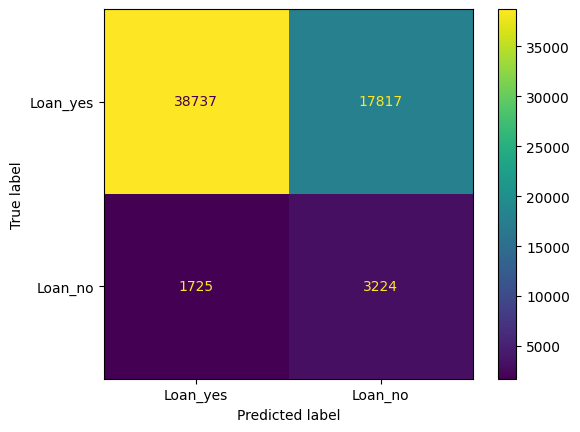

In [57]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

2. Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_res, y_res)

RandomForestClassifier()

In [60]:
y_pred2 = model2.predict(X_test)
accuracy = model2.score(X_test, y_test)
accuracy

0.8869486041331317

In [61]:
#scores
print('train score', model2.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred2))
print('precision score', precision_score(y_test, y_pred2))
print('recall', recall_score(y_test, y_pred2))
print('f1 score', f1_score(y_test, y_pred2))

train score 1.0
accuracy 0.8869486041331317
precision score 0.20718877849210987
recall 0.1432612649020004
f1 score 0.1693943375940748


In [62]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[53841,  2713],
       [ 4240,   709]], dtype=int64)

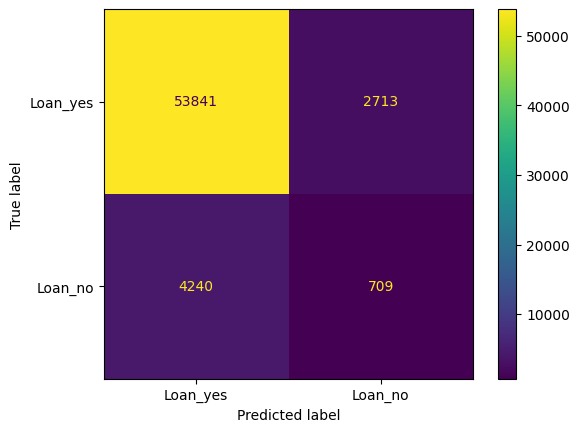

In [63]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [64]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     56554
           1       0.21      0.14      0.17      4949

    accuracy                           0.89     61503
   macro avg       0.57      0.55      0.55     61503
weighted avg       0.87      0.89      0.88     61503



3. naive bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_res, y_res)

GaussianNB()

In [66]:
y_pred3 = model3.predict(X_test)

In [67]:
#scores
print('train score', model3.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred3))
print('precision score', precision_score(y_test, y_pred3))
print('recall', recall_score(y_test, y_pred3))
print('f1 score', f1_score(y_test, y_pred3))

train score 0.1657425774771552
accuracy 0.1667073150903208
precision score 0.08235463910086414
recall 0.922408567387351
f1 score 0.15120900960582975


In [68]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[ 5688, 50866],
       [  384,  4565]], dtype=int64)

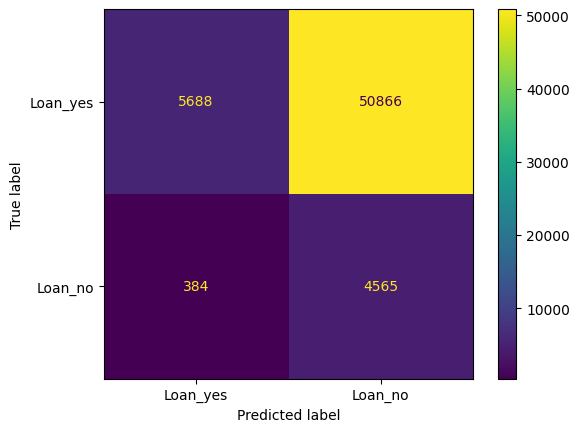

In [69]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [70]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.10      0.18     56554
           1       0.08      0.92      0.15      4949

    accuracy                           0.17     61503
   macro avg       0.51      0.51      0.17     61503
weighted avg       0.87      0.17      0.18     61503



### XGB

In [71]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.9106222460692974

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56554
           1       0.30      0.08      0.13      4949

    accuracy                           0.91     61503
   macro avg       0.61      0.53      0.54     61503
weighted avg       0.87      0.91      0.89     61503



In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55605,   949],
       [ 4548,   401]], dtype=int64)

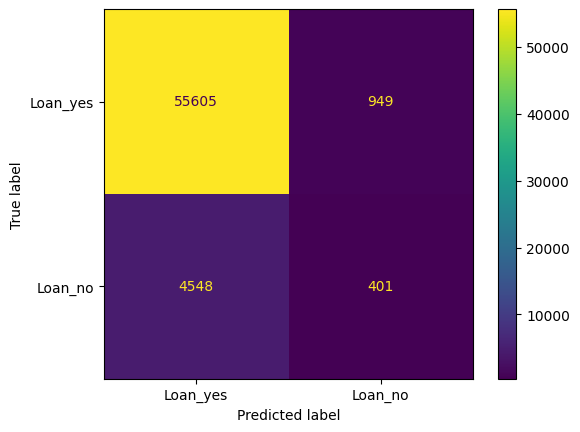

In [79]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()